In [127]:
import torch
import matplotlib.pyplot
import torchvision
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [23]:
ds = torchvision.datasets.CIFAR10('./', download=True, transform=torchvision.transforms.ToTensor())
a, y = ds[1]
a.shape

Files already downloaded and verified


torch.Size([3, 32, 32])

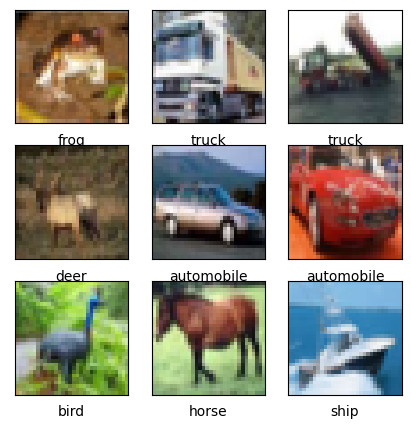

In [32]:
# show a 9x9 grid of images example from dataset ds, with text labels
plt.figure(figsize=(5,5))
for i in range(3*3):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(ds[i][0].permute(1, 2, 0))
    plt.xlabel(ds.classes[ds[i][1]])

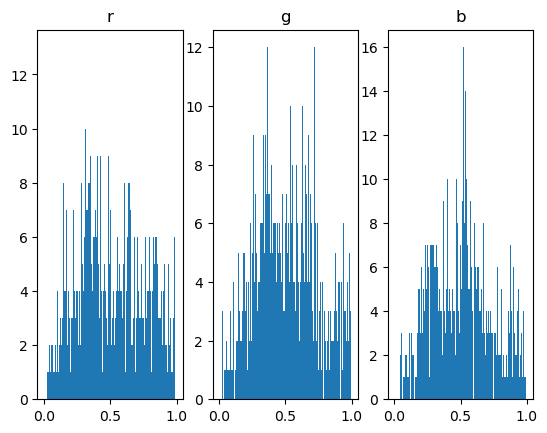

In [82]:
a, y = ds[1]
for c in range(3):
    xc = a[c]
    plt.subplot(1, 3, c+1)
    plt.hist(xc.ravel(), bins=256, range=(0.0, 1.0));
    plt.title(["r", "g", "b"][c])

In [120]:
# y: (B)  yh: (B)

y = torch.tensor([1, 2, 3, 4])
a = torch.tensor([1, 0, 0, 0])

def accuracy(y, yh):
    return (y == yh).float().mean()

accuracy(y, a)


tensor(0.2500)

In [104]:
dl = torch.utils.data.DataLoader(ds)

a, y = ds[0]
W, H, C = a.shape
D = W * H * C # 3072

W1 = torch.randn(D, D) / torch.tensor(D).sqrt()
b1 = torch.zeros(D)
W2 = torch.randn(D, 1024) / torch.tensor(D).sqrt()
b2 = torch.zeros(1024)
W3 = torch.randn(1024, 10) / torch.tensor(1024).sqrt()
params = [W1, b1, W2, b2, W3]

for p in params:
    p.requires_grad = True

In [134]:
dl = torch.utils.data.DataLoader(ds, batch_size=8)
xb, yb = next(iter(dl))
lr = 0.01

for i in range(100):
    for p in params:
        p.grad = None

    B, C, W, H = xb.shape # torch.Size([8, 3, 32, 32])
    a = xb.view(B, -1) # (B, D)
    a = a @ W1 + b1
    a = a.tanh()

    a = a @ W2 + b2
    a = a.tanh()
    logits = a @ W3 # (B, 10)
    loss = torch.nn.functional.cross_entropy(logits, yb)
    loss.backward()

    prob = F.softmax(logits, dim=1) # (B, 10)
    yh = torch.argmax(prob, dim=1) # (B)
    acc = accuracy(yh, yb)

    with torch.no_grad():
        for p in params:
            p -= lr * p.grad

    if i % 10 == 0:
        print(f"{i:4d}: {loss.item():.4f} {acc:.4f}")

0:4d: 0.0031 1.0000
10:4d: 0.0031 1.0000
20:4d: 0.0030 1.0000
30:4d: 0.0030 1.0000
40:4d: 0.0030 1.0000
50:4d: 0.0029 1.0000
60:4d: 0.0029 1.0000
70:4d: 0.0029 1.0000
80:4d: 0.0028 1.0000
90:4d: 0.0028 1.0000


In [ ]:
dl = torch.utils.data.DataLoader(ds, batch_size=8)
xb, yb = next(iter(dl))
lr = 0.01

for i in range(100):
    for p in params:
        p.grad = None

    B, C, W, H = xb.shape # torch.Size([8, 3, 32, 32])
    a = xb.view(B, -1) # (B, D)
    a = a @ W1 + b1
    a = a.tanh()

    a = a @ W2 + b2
    a = a.tanh()
    logits = a @ W3 # (B, 10)
    loss = torch.nn.functional.cross_entropy(logits, yb)
    loss.backward()

    prob = F.softmax(logits, dim=1) # (B, 10)
    yh = torch.argmax(prob, dim=1) # (B)
    acc = accuracy(yb, a)

    with torch.no_grad():
        for p in params:
            p -= lr * p.grad

    if i % 10 == 0:
        print(f"{i}: {loss.item()}")

torch.Size([8])


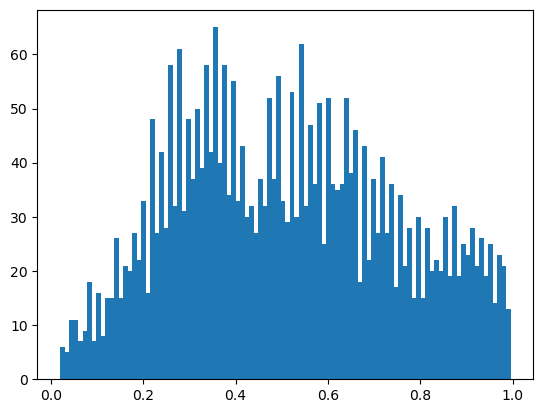

In [84]:
plt.hist(a.ravel(), bins=100)